In [2]:
import os

downloads = os.path.expanduser(r"~\Downloads")
print("Searching inside:", downloads)

matches = []
for root, dirs, files in os.walk(downloads):
    for d in dirs:
        if "cifar" in d.lower():
            matches.append(os.path.join(root, d))

print("\nFound folders containing 'cifar':", len(matches))
for m in matches:
    print(m)

Searching inside: C:\Users\sarit\Downloads

Found folders containing 'cifar': 4
C:\Users\sarit\Downloads\venv\Lib\site-packages\keras\datasets\cifar10
C:\Users\sarit\Downloads\venv\Lib\site-packages\keras\datasets\cifar100
C:\Users\sarit\Downloads\venv\Lib\site-packages\keras\_tf_keras\keras\datasets\cifar10
C:\Users\sarit\Downloads\venv\Lib\site-packages\keras\_tf_keras\keras\datasets\cifar100


In [3]:
from tensorflow.keras.datasets import cifar10
from PIL import Image
import os

# Create the folder in your Documents folder (safe & no permission issues)
base = os.path.join(os.path.expanduser("~"), "Documents", "cifar-10-img")
train_dir = os.path.join(base, "train")
test_dir  = os.path.join(base, "test")

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Function to save images class-wise
def save_split(x, y, out_dir, prefix):
    os.makedirs(out_dir, exist_ok=True)
    for i in range(len(x)):
        class_dir = os.path.join(out_dir, str(int(y[i][0])))
        os.makedirs(class_dir, exist_ok=True)
        Image.fromarray(x[i]).save(os.path.join(class_dir, f"{prefix}_{i}.png"))
    print(f"✅ Saved {len(x)} images in {out_dir}")

# Save training and test images
save_split(x_train, y_train, train_dir, "train")
save_split(x_test, y_test, test_dir, "test")

print("\n🎯 CIFAR-10 image folders created successfully!")
print("Train directory:", train_dir)
print("Test directory:", test_dir)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 98s 1us/step
✅ Saved 50000 images in C:\Users\sarit\Documents\cifar-10-img\train
✅ Saved 10000 images in C:\Users\sarit\Documents\cifar-10-img\test

🎯 CIFAR-10 image folders created successfully!
Train directory: C:\Users\sarit\Documents\cifar-10-img\train
Test directory: C:\Users\sarit\Documents\cifar-10-img\test


In [5]:
import os
print("Train exists:", os.path.exists(train_dir))
print("Test exists:", os.path.exists(test_dir))
print("Train classes:", os.listdir(train_dir))

Train exists: True
Test exists: True
Train classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [7]:
import os
print(os.path.expanduser("~"))

C:\Users\sarit


In [9]:
train_dir = "C:\\Users\\sarit\\Documents\\cifar-10-img\\train"
test_dir  = "C:\\Users\\sarit\\Documents\\cifar-10-img\\test"

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

In [11]:
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

Found 50000 images belonging to 10 classes.


In [12]:
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)


Found 10000 images belonging to 10 classes.


In [13]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [14]:
import os; print(os.path.expanduser("~"))

C:\Users\sarit


In [15]:
weights_path = "C:\\Users\\USER\\.keras\\models\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
import os
print(os.path.exists(weights_path))

False


In [16]:
import os
home = os.path.expanduser("~")
matches = []
for root, dirs, files in os.walk(home):
    for f in files:
        if f.lower().startswith("vgg") and f.lower().endswith(".h5"):
            matches.append(os.path.join(root, f))
print("Found:", matches or "No files found")

Found: No files found


In [17]:
weights_path = "C:\\Users\\USER\\.keras\\models\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [18]:
import os
print(os.path.join(os.path.expanduser("~"), ".keras", "models"))

C:\Users\sarit\.keras\models


In [19]:
for layer in base_model.layers:
   layer.trainable = False

In [21]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 424ms/step - accuracy: 0.2132 - loss: 2.1405 - val_accuracy: 0.4280 - val_loss: 1.6487
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 407ms/step - accuracy: 0.4247 - loss: 1.6193 - val_accuracy: 0.4700 - val_loss: 1.5005
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 410ms/step - accuracy: 0.4803 - loss: 1.4870 - val_accuracy: 0.4930 - val_loss: 1.4591
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 423ms/step - accuracy: 0.5095 - loss: 1.3694 - val_accuracy: 0.5090 - val_loss: 1.3927
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 412ms/step - accuracy: 0.5383 - loss: 1.3267 - val_accuracy: 0.5170 - val_loss: 1.3569
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 413ms/step - accuracy: 0.5674 - loss: 1.2255 - val_accuracy: 0.5360 - val_loss: 1.3141
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 409ms/step - accuracy: 0.6002 - loss: 1.1516 - val_accuracy: 0.5440 - val_loss: 1.2976
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 403ms/step - accuracy: 0.6125 - loss: 1.0982 - val_accu

In [23]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step


In [26]:
# CIFAR-10 label names in correct order
labels = [
    'airplane',  # 0
    'automobile',# 1
    'bird',      # 2
    'cat',       # 3
    'deer',      # 4
    'dog',       # 5
    'frog',      # 6
    'horse',     # 7
    'ship',      # 8
    'truck'      # 9
]

Preditcted:  horse
Actual:  horse


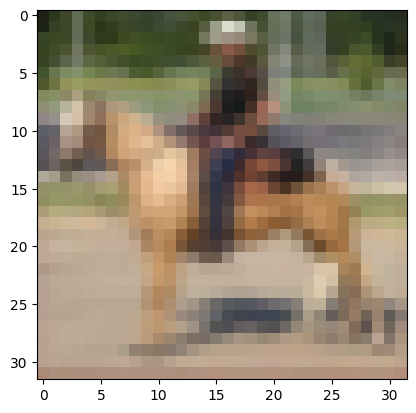

In [28]:
n = 590
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  airplane
Actual:  airplane


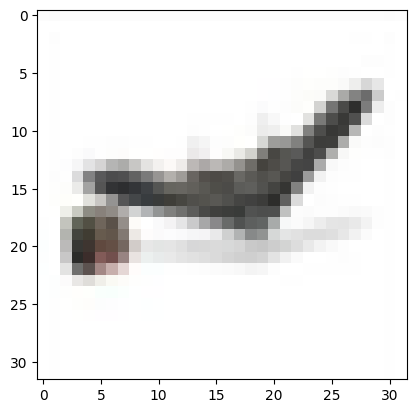

In [33]:
n = 900
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])